---

# Machine Learning practico con la ayuda de Python
# Capitulo 7: Un ejemplo de clasificacion: el problema del Iris

## Aldo Humberto Romero 

### BUAP, Marzo, 2022

---

Estas notas estasn basadas en una variedad de fuentes. Algunos notebooks que pueden encontrar interesantes son


### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelein Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml)
   [Second Edition (In preparation)](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 

## Configuracion

Este cuaderno de Jupyter fue creado para Python 3. Algunas paquetes de IPython son tambien usados.

In [1]:
# %matplotlib inline - allows one to display charts from the matplotlib library in a notebook
# %load_ext autoreload - automatically reloads imported modules if they change
# %autoreload 2 - automatically reloads imported modules if they change
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext watermark
%watermark

Last updated: 2022-03-24T14:08:56.436444+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
%watermark -iv

numpy     : 1.21.5
sklearn   : 1.0.2
matplotlib: 3.5.1



# Scikit-Learn: Introduccion

Scikit-learn es una coleccion de herramientras de ML escritas en Python
[http://scikit-learn.org](http://scikit-learn.org)

## Representacion de los datos en Scikit-learn

La mayoria de los algoritmos de ML implementados en scikit-learn espera datos que son guardados en
Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**matrices or arreglos bidimensionales**.  Los arreglos puede ser ``numpy.ndarray``, o en algunos casos matrices de ``scipy.sparse``. El tamaño del arreglo es esperado a ser:  `[n_muestras, n_caracteristicas]`

- **n_muestras:**   El numero de muestras es un item a procesar (por ejemplo a clasificar). Puede ser un documento, una image, un sonido, un video, un objeto, un estructura cristalina, una fila en una base de datos o un archivo CSV, o cualquier cosa que yo pueda decribir con numero finito de caracteristicas. 

- **n_caracteristicas:**  El numero de caracteristicas que puede ser usar para describir cada item de una manera cuantitativa. Caracteristicas so usualmente de valor real pero tambien pueden ser logicas (True or False) o de valores discrestos en algunos casos.


El numero de caracteristicas se debe conocer de antemano. Sin embargo, puede ser de una dimension muy grande (hasta de millones) y que puede tener hasta muchos ceros para uno de los datos en particular. Cuando hay muchos ceros, es un caso donde las matrices `scipy.sparse` resultan muy utiles, ya qu que se manejan mas eficientemente en memoria que en el caso de arreglos de numpy.


Un algoritmo de clasificacion, por ejemplo, espera datos que son representados en una **matrix de caracteristicas** y un **vector de etiquetas**:


$$
{\rm matrix~caracteristicas:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm vector~etiquetas:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Para este caso, tenemos $N$ muestras y $D$ caracteristicas.

## Ejemplo 1: Datos de Iris de Anderson  

Este es un ejemplo de in conjunto de datos muy sencillos y nosotros vamos a echarle una mirada a estos datos que ya estan guardados dentro de scikit-learn.

EL conjunto de datos llamado "Iris" porque se refiere a la flor con ese nombre, es el mas comun de los conjuntos de datos usados para introducir topicos en el area de reconocimiento de patrones. El conjunto de datos contiene 150 valores de flores de Iris colectados en Hawaii. Estos datos estan divididos en tres clases: 

 <table>
  <tr>
    <th><img src="fig/Iris-setosa-10_1.jpg" alt="Iris Setosa" style="width:200px"></th>
    <th><img src="fig/Iris-versicolor-21_1.jpg" alt="Iris Versicolor" style="width:200px"></th>
    <th><img src="fig/Iris-virginica-3_1.jpg" alt="Iris Virginica" style="width:200px"></th>
  </tr>
  <tr>
    <td>Iris Setosa</td>
    <td>Iris Versicolor</td>
    <td>Iris Virginica</td>
  </tr>
</table> 

Cada flor se clasifica de acuerdo a cuatro medidas, el ancho y la longitud del sepalo y el ancho y la lontidud del petalo. Estas medidas son tomadas para cada una de las flores:

<img src="fig/iris.gif" alt="Iris Setosa" style="width:200px">

Informacion especifica de los datos es: 

    4 caracteristicas con valores numericos, sin ningun dato faltante. 
        longitud del sepalo enn cm
        ancho del sepalo en cm
        longitud del petalo en cm
        ancho del petalo en cm 
    3 clases, Iris Setosa, Iris Versicolour, Iris Virginica
    Tamaño de la base de datos: 150 entries
    distribucion de los datos: 50 entries for each class 

Hay diferentes articulos que usan estos datos, como por ejemplo: 

 * **Fisher,R.A.** *The use of multiple measurements in taxonomic problems* Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).

 * **Duda,R.O., & Hart,P.E.** *Pattern Classification and Scene Analysis* (1973) (Q327.D83) John Wiley & Sons. ISBN 0-471-22361-1. See page 218.

 * **Dasarathy, B.V.** *Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments*. (1980)  IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.

 * **Gates, G.W.** *The Reduced Nearest Neighbor Rule*. (1972) IEEE Transactions on Information Theory, May 1972, 431-433. 

En estos datos, la Iris Setosa es mas facil de distinguie que las otras dos clases, mientras que las otras dos clases son parecidas y es mas dificil de separarlas. 

Mas informacion asobre este problema en el contexto de reconocimiento de imagenes y patrones:
 
 * On [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)
 
 * Descripcion de [Conjunto de datos de Iris](http://mirlab.org/jang/books/dcpr/dataSetIris.asp?title=2-2%20Iris%20Dataset) por Roger Jang como parte de su libro sobre [Agregamiento de datos y reconocimiento de patrones](http://mirlab.org/jang/books/dcpr/)


### Cargando los datos de  Iris con Scikit-Learn

- Caracterisiticas de los datos:

  1. Longitud del sepalo en cm
  2. Ancho del sepalo en cm
  3. Longitud del petalo en cm
  4. Ancho del petalo en cm

- Clases a predecir:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` contiene una copia de los datos en archivo tipo CSV con una funcion de ayuda

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

The dataset from scikit-learn is well organized into a dictionary

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
n_samples, n_features = iris.data.shape
print("Number of Samples:", n_samples)
print("Number of features:", n_features)

Number of Samples: 150
Number of features: 4


Ambos datos y objetivos son objetos `numpy.ndarray` con los tamaños

In [10]:
print(type(iris.data))
print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
(150, 4)
(150,)


Por ejemplo miremos los ultimos 5 elementos:

In [11]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

El objetivo contiene 150 digitos que corresponden a las 3 clases descritas antes

In [12]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Los datos son cuatridimensionales, pero como podemos visualizar solo dos de sus dimensiones a la vez usando el tipo de grafica de puntos (scatter-plot):

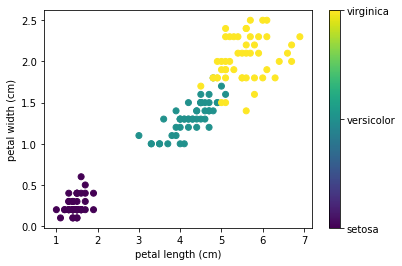

In [13]:
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

Todas las relaciones se pueden ver en una grid de 4x4 de subgraficas usando matplotlib

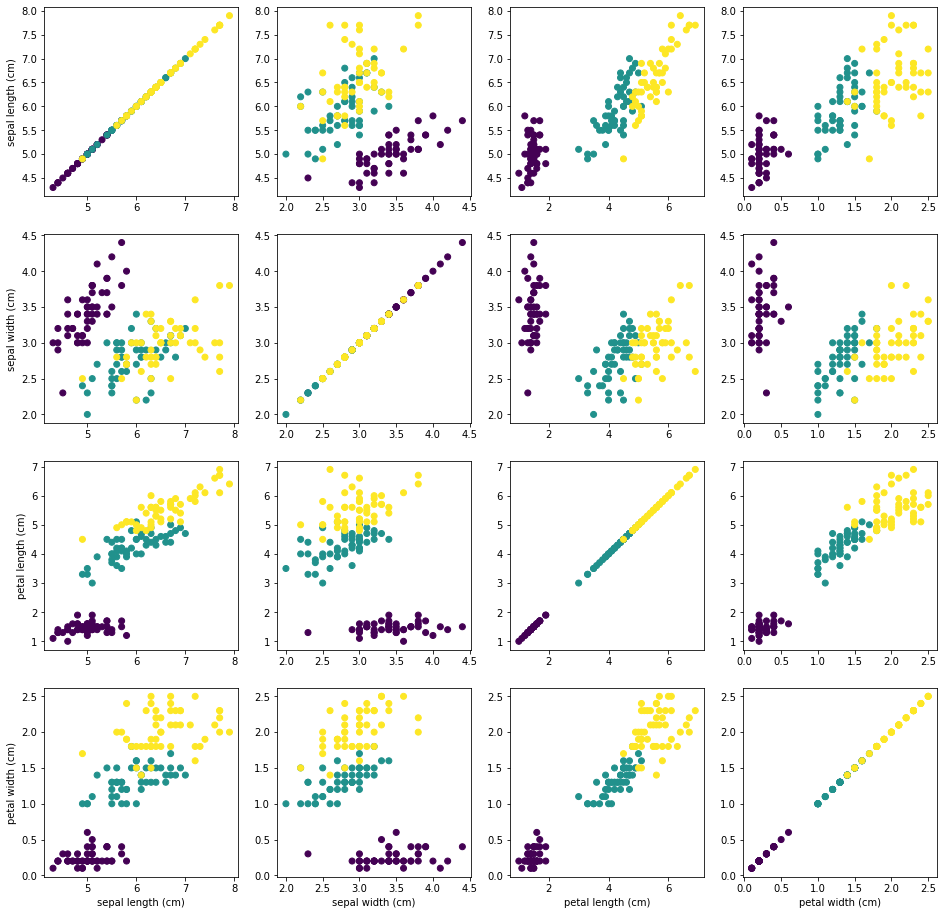

In [14]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
fig, axes=plt.subplots(nrows=4, ncols=4, figsize=(16,16))

for i in range(4):
    for j in range(4):
        axes[i,j].scatter(iris.data[:, j], iris.data[:, i], c=iris.target)
        if i==3: axes[i,j].set_xlabel(iris.feature_names[j])
        if j==0: axes[i,j].set_ylabel(iris.feature_names[i]);
    

De las figuras podemos concluir que la variedad **setosa** esta relativamente separada de **versicolor** y **virginica**, pero estas dos ultimas son mas dificules de distinguir, aunque algunas propiedades ayudan  mas que otras.

# Regresion logistica como un clasificador

Regresion logistica es una metodo estadistico que es usado para analizar conjunto de datos en los que uno o mas de las variables independientes dar un resultado binario (Verdadero/Falso, 1/0). Es decir que tiene dos posibles categorias (categoricos). Por ejemplo, es el tumor cancerigeno? o es este email spam? cierta persona estaria dispuesta a votar por partido A o no?. 

EL proposito de esta metodologia es encontrar un modelo que describa lo mejor posible la relacion entre las variables independientes (por ejemplo edad, fumar, sexo, etc), pero que nos de un resultado que podamos clasificar en las dos categorias (adquiere o no cierta enfermedad). Por lo tanto la idea es encontrar algun esquema que nos de una dependencia como si fuerea una forma de "S" (sigmoide .. recuerden esta forma, porque cuando hablemos de redes neuronales no la volveremos a encontrar). 

<img src="fig/Simple-Logistic-Regression.jpg" alt="Iris Setosa" style="width:300px">

Cuando estas a un lado, podemos definir que es el cero, cuando estas al otro sera un uno y en la region intermedia, con algun criterio diremos que esta en una o en la otra categoria. La distribucion de la probabilidad que tiene esta forma resulta ser:


$$
\log \left( \frac{p}{1-p} \right) = a + b_1 x_1 + b_2 x_2 \cdots
$$

donde $p$ es la probabilidad que la caracteristica de interes este present y $x_1, x_2, \cdots$ son las variables de entrada que en principio son independientes. Los parametetros $a, b_1, b_2, \cdots$ son los parametros del modelo y que el algoritmo tiene que determinar. Por lo tanto nuestro problema es optimizar la distribucion de probabilidad, por lo tanto no usaremos el viejo y conocido metodo de minimos cuadrados, sino que usamos el de optimizar el "likelihood". Un lugar donde esta bien descrito este model lo pueden encontrar en 
[Logistic Regression lecture](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf).

Un alto en el camino. Como se imaginaran, en muchas ocasiones nosotros no sabemos cual es al distribucion de los datos, por lo tanto estos casos tenemos que generalizar este metodo, por lo tanto, recomendacion, un buen curso de estadistica les puede ayudar para cubrir las deficiencias. Para nuestro curso no es tan importante, lo importante es que entiendan lo que tratamos de hacer. 

In [15]:
print(iris["data"].shape)
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0

(150, 4)


**Note**: EL metodo para encontrar los parametros no es unico y en Scikit-Learn hay varios, en el manual dice:

```
solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
```

Nosotros usaremos el default. Pueden leer de estos metodos en el manual.

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

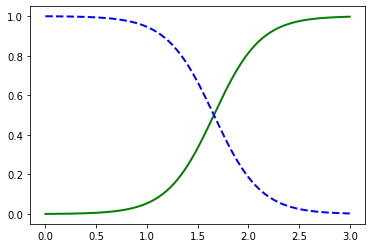

In [17]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

Que se puede hacer mas bonita

/Users/aldoromero/miniforge3/lib/python3.9/site-packages/matplotlib/patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


(0.0, 3.0, -0.02, 1.02)

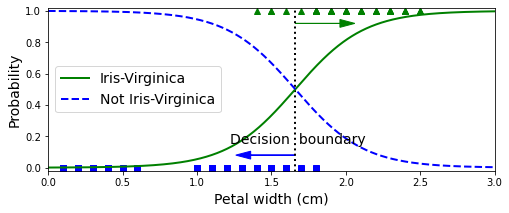

In [18]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

In [19]:
decision_boundary

array([1.66066066])

In [20]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

/var/folders/sd/7rq2vwcx7fd8stfzsvfnz9980000gq/T/ipykernel_96182/1898775203.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


(2.9, 7.0, 0.8, 2.7)

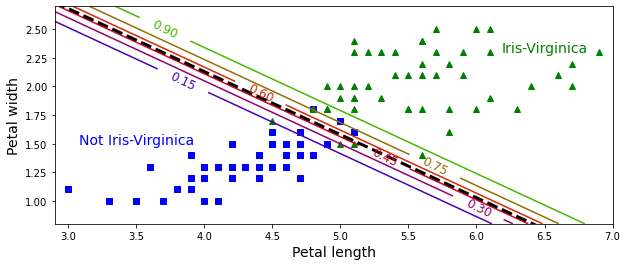

In [22]:
# generalizamos el problema a tener ahora dos variables

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

In [21]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
print(y[:10])
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

[0 0 0 0 0 0 0 0 0 0]


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

(0.0, 7.0, 0.0, 3.5)

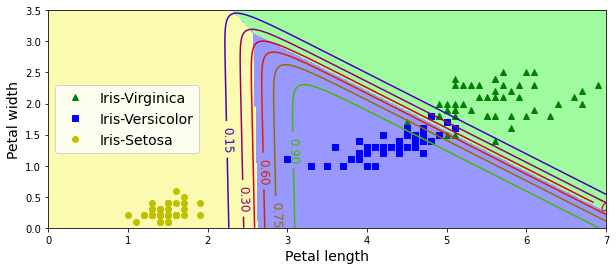

In [22]:
# logistic but 3 classes, where the largest is defined by the statistical analysis of occurrence
# of the training data
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])


In [23]:
softmax_reg.predict([[5, 2]])

array([2])

In [24]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Otros datos disponibles

Scikit-learn ofrece una coleccion de conjuntos de datos no muy grandes que podemos usar para "aprender", pero recuerden que en la vida real, el numero de datos son millones.


### Conjuntos de datos pequeños

Estos **pequeños** conjuntos de datos vienen con la instalacion de scikit-lean pero tambien pueden ser bajados directamente usando la aplicacion ``sklearn.datasets.load_*``

In [27]:
[x for x in sklearn.datasets.__dict__.keys() if x[:5]=='load_']

['load_breast_cancer',
 'load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_images',
 'load_sample_image',
 'load_wine',
 'load_svmlight_file',
 'load_svmlight_files']

### Buscador de conjuntos de datos

Algunos conjuntos de datos mas grandes, estan disponibles para descargar (Cuidado con la coneccion a internet) y scikit-learn tiene herramientas para ayudar en este proceso y que pueden ser encontradas en:


  ``sklearn.datasets.fetch_*``

In [28]:
[x for x in sklearn.datasets.__dict__.keys() if x[:6]=='fetch_']

['fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_openml',
 'fetch_olivetti_faces',
 'fetch_species_distributions',
 'fetch_california_housing',
 'fetch_rcv1']

### Generacion de conjuntos de datos

Ya vimos anteriormente que scikit permite generar modelos de datos aleatorios y que estan disponibles en
 ``sklearn.datasets.make_*``

In [29]:
[x for x in sklearn.datasets.__dict__.keys() if x[:5]=='make_']

['make_classification',
 'make_multilabel_classification',
 'make_hastie_10_2',
 'make_regression',
 'make_blobs',
 'make_moons',
 'make_circles',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_low_rank_matrix',
 'make_sparse_coded_signal',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll',
 'make_s_curve',
 'make_sparse_spd_matrix',
 'make_gaussian_quantiles',
 'make_biclusters',
 'make_checkerboard']

### Objeto llamado ``Estimator`` de Scikit-learn 

Cada algoritmo es creado en scikit-learn a travez del objeto ''Estimator'' (que es basicamente la inicializacion del modelo). Eso quiere decir que cuando se llama esta objeto, el sistem prepara las variables y los parametros necesarios para que luego podemos aplicar el metodo ``fit`` para procesar los datos. Luego las predicciones se pueden realizar. 

Basicamene en scikit, el proceso siempre es el mismo


1. importe el model

2. initialize el modelo

3. entrene o fitee el model

4. use el modelo para predecir.


Por ejemplo:


In [25]:
from sklearn.linear_model import LinearRegression

**Parametros del Estimator**: Todos los parametros del estimador pueden ser inicializados cuando este es "instanciado" pero en general tiene valores por default que `usualmente` trabajan.

In [26]:
model = LinearRegression(normalize=True)
print (model.normalize)

True


In [27]:
print (model)

LinearRegression(normalize=True)


**Estimar los parametros del modelo**: Cuando datos son *fit* con un estimador, los parametros del modelo son estimados. Todos los parametros estimados del objeto estimador siempre terminan con el simbolo "_".

Por ejemplo consideremos 5 puntos en el dominio de $x$ y la funcion $y=f(x)$ que sera algo aleatoria

Esto es porque en las ultimas versions de sklearn, hay un paquete de preprocesamiento que tiene muchas funciones y que nos ayudan a transformar las clases de los datos en algo que es mas util para los estimadores que usamos.


In [28]:
#Generate a random n-class classification problem, default 20
#n_classes default=2
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

#Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
print(y_train[:10])
print(pipe.score(X_test, y_test))  # apply scaling on testing data, without leaking training data.

(100, 20)
(100,)
(75, 20)
(25, 20)
[1 1 1 1 1 0 0 1 1 1]
0.96


#### Clasificacion usando KNN 

Como discutimos ya K nearest neighbors (kNN) es uno de los estrategias no parametricas mas sencillas que puede ser usado tanto para clasificacion como para regresion.

En este algorithmo la clase se predice a partir de una medida de similaridad (se tiene que definir lo que uno llama distancia, es decir lo que se llama en matematica una metrica, la mas familiar para ustedes es la Euclidiana, pero tambien estan la Manhattan y la Minkowski). Lo que si es importante es que todas las medidas de las diferentes caracteristidas tienes que ser medidas con la misma escala, por lo que si en los datos que se tienen, no son la misma, se ACONSEJA MUCHISIMO que se escalen a una manera estandar.

Veamos como funciona para el caso de los datos de Iris.

In [29]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print (iris.target_names[result])

['virginica']


Usando este kNN nosotros podemos crear un mapa de todos los diferentes resultados posibles cuando variamos los valores de las medidas de los petalos y fijamos el sepalo a medidas de 3cm y 5cm. Para esto haremos uso de la funcion linspace de numpy que regresa un vector de numeros espaciados igualmente dentro de un intervalo especifico.

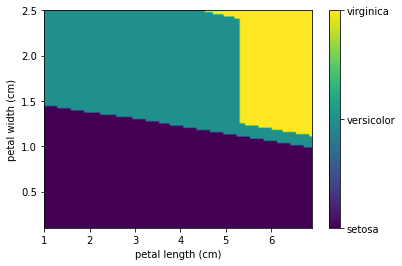

In [35]:
N=100
preds = np.zeros((N,N))
x0 = 3
x1 = 5
minx2=np.min(iris.data[:,2])
maxx2=np.max(iris.data[:,2])
x2 = np.linspace(minx2, maxx2, N, endpoint=True)
minx3=np.min(iris.data[:,3])
maxx3=np.max(iris.data[:,3])
x3 = np.linspace(minx3, maxx3, N, endpoint=True)

for i in range(N):
    for j in range(N):
        preds[i,j]=knn.predict([[x0, x1 , x2[i], x3[j]],])

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
        
plt.imshow(preds[::-1], extent=[minx2,maxx2, minx3, maxx3],aspect='auto')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);

#### Clasification con el metodo de vector soportado (Support Vector Machine, SVM)

El proposito del algoritmo denominado Support Vector Machine (SVM) es encontrar un hiperplano en un espacio N-dimensional (donde N es el numero de caracteristicas = features) que distintamente clasificlan los datos de entrada. Este algoritmo recibe datos de entrenamiento etiquetado y algoritmo encuentra un plano en el hiperespacio que categoriza los nuevos ejemplos. En un espacio de dos dimensiones este hiperplano es una linea que divide el plano bidimensional en dos partes donde cada clase cae a un lado o otro de la linea.

Nuestro objetivo es encontrar el plan con  un maximo margen, es decir la maxima distancia entre los puntos de ambas clases. Maximizando la distancia marginal refuerza la idea que futros puntos pueden ser clasificados con mayor confidencia. 

In [30]:
from sklearn.svm import SVC

In [31]:
model = SVC(gamma='scale')
model.fit(X, y)
result = model.predict([[3, 5, 4, 2],])
print (iris.target_names[result])

['versicolor']


In [32]:
a=(5,)
a

(5,)

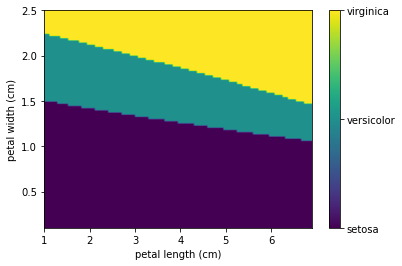

In [33]:
N=100
preds = np.zeros((N,N))
x0 = 3
x1 = 5
minx2=np.min(iris.data[:,2])
maxx2=np.max(iris.data[:,2])
x2 = np.linspace(minx2, maxx2, N, endpoint=True)
minx3=np.min(iris.data[:,3])
maxx3=np.max(iris.data[:,3])
x3 = np.linspace(minx3, maxx3, N, endpoint=True)

for i in range(N):
    for j in range(N):
        preds[i,j]=model.predict([[x0, x1 , x2[i], x3[j]],])

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
        
plt.imshow(preds[::-1], extent=[minx2,maxx2,minx3,maxx3],aspect='auto')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);

#### Ejemplo de regresion

E caso mas simple para una regresion es fitear una linea a los datos datos:

Model coefficient: 3.93491, and intercept: 1.46229


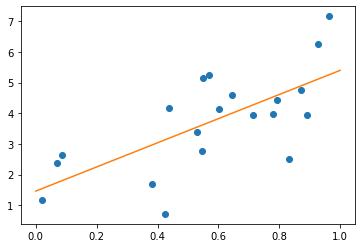

In [34]:
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print ("Model coefficient: %.5f, and intercept: %.5f"
       % (model.coef_, model.intercept_))

# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test);

Bueno hagamos un alto en el camino, solo para ver otros algoritmos, que aunque no estan relacionados con el caso del Iris, nos van a dar mas ideas sobre como funciona este proceso de ML. Y usaremos esto para hablar de otros conceptos que son utiles en ML en general, independiente del algoritmo.

### Aprendizaje no supervisado: reduccion de dimensionalidad y agregamiento 

**Aprendizaje no supervisado** se enfoca en un tipo diferente de problema. Aque los datos no tienen etiquetas, y nosotros estamos interesados en encontrar el patron o la estructura entre los objetos en cuestions. De cierta manera, uno puede pensar el aprendizaje no supervisado como un medio para encontrar las etiquetas de los datos de manera independiente. El aprendizaje no supervisado tiene tareas como: *dimensionality reduction*, *clustering*, y
*density estimation*. Por ejemplo, en caso de los datos de Iris que hemos discutido, nosotros podemos usar metods no supervisados para determinar las combinaciones de las medidas que mejor describan la estructura de los datos. Para nuestro caso, usaremos representaciones en 2D pero no hay razon para eso, solo que lo podemos ver.

Algunos problemas donde se ha usado aprendizaje no supervisado son:

- Data observaciones obtenidas por un telescopiop, determinar las combinaciones o caracteristicas de los datos que mejor resumen la informacion. 
- Dada la mezcla de dos fuentes de sonido (por ejemplo una persona hablando al mismo tiempo que hay una cancion). Poder separar las dos (este problema se suele llamado [separacion ciega de la fuente](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- Dado un video, aislar el objeto que se esta moviendo y categorizar su relacion con los otros objetos que estan presentes. 

Algunas veces se puede  combinar aprendizaje supervisado y no supervisado, por ejemplo usando el no supervisado para encontrar las caracteristicas mas utiles que describen datos heterogeneos y luego estas estas caracteristicas (features) dentro de un metodo supervisado.

#### Reduccion de Dimensionalidad: PCA

Analisis de las componentes principales (o en ingles Principle Component Analysis (PCA)) es un metodo de reduccion 
de dimensionlidad que trata de encontrar las combinaciones de variables que tienen la mayor varianza con respecto a las predicciones. Es uno de los metodos mas populares en esta area de Machine Learning. Algunas veces se puede usar de manera independiente y otras veces es el punto donde se comienza a crear el model y se usa las variables reducidad para crear el modelo. PCA es una proyeccion que transforma los datos proyectandolos en un conjunto de ejes ortogonales.

PCA encuentra un nuevo conjunto de dimensiones (o un conjunto base) tal que las nuevas dimensiones son ortogonales (y por lo tanto linealmente independientes) y las valora de acuerdo a la varianza de los datos a log largo de ellas (mas importante quiere decir mas varianza de los datos)

COmo funciona en palabras faciles (volveremos a hablar de esto mas adelante:

Calcule la covarianza de la matriz de puntos que se tiene (X)

Calcular los vectores propios y los correspondientes valores propios.

Ordene los vectores propios de acuerdo a los valores propios en orden descendente.

Escoja los primeros K vectores propios y esta sera la base en K dimensiones

Transforme los datos originales que estaban en n dimensiones a los puntos en K dimensiones.


Considere de nuevo el conjunto de datos del Iris. Como no puede ser visualizada en una grafica de 2D ya que tiene 4 "features". Podemos encontrar 2 combinaciones entre las dimensiones de sepalo y petalo para poder visualizarlo:

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


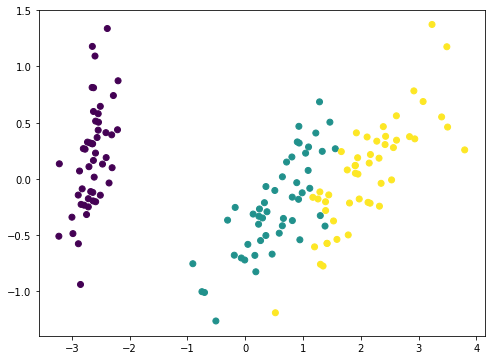

In [35]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print ("Reduced dataset shape:", X_reduced.shape)

fig,ax=plt.subplots(figsize=(8,6))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

print ("Meaning of the 2 components:")
for component in pca.components_:
    print (" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

#### Clustering: K-means

Bueno ya hablamos del K-means, es uno de los mas sencillos y mas popular de los algoritmos no supervisados en ML.

La idea principal con este algoritmo es agrupar datos similares en clusters y trata de encontrar como los datos se distribuyen alreadedor de un cierto numero de clusters.

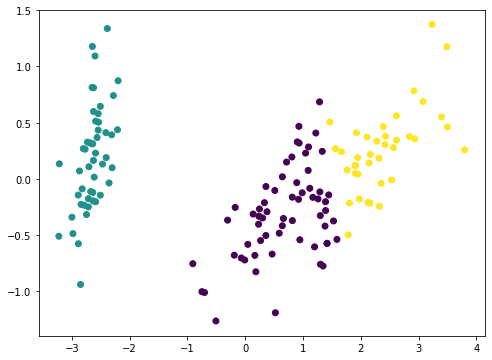

In [36]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

fig,ax=plt.subplots(figsize=(8,6))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

### Interface al "estimator" de Scikit 

Scikit-learn es conocido por tener una interface uniforme entre todos los metodos. Por lo tanto, dado un *estimador* llamado `modelo`, los siguientes metodos estan disponibles:


- Disponible en **todos los estimadores**
  + `model.fit()` : `fitea` los datos de entrenamiendo. Para aplicaciones de aprendizaje supervisado, aceptad dos argumentos, los datos `X` y las etiquetas `y` (es decir `model.fit(X,y)`). Para las aplicaciones de aprendizaje no supervisado, acepta solo un argumento, el de los datos `X` (es decir `model.fit(X)`).
- Disponible en **estimadores supervisados**
  + `model.predict()` : dado un modelo de entrenamiento, predice la etiqueta de un nuevo conjunto de datos. Este metodo acepta un argumento, los nuevos datos `X_new` (es decir `model.predict(X_new)`), y regresa la etiqueta aprendida para cada objeto en el arreglo.
  + `model.predict_proba()` : Para problemas de clasificacion, algunos estimadores tambien proveen este metodo, que regresa la probabilidad que una nueva observacion tenga uno de las etiquetas categoricas. En este caso, la etiqueta con la mas alta probabilidad regresa cuando se usa `model.predict()`.
  + `model.score()` : es para problemas de clasificacion o regresion, funciona para todos los estimadores que implementadn on metodo de puntaje. Los puntajes pueden ser entre 0 y 1, el puntaje mas alto indica que es el mejor "fit". 
- Disponible en **estimadores no supervisados**
  + `model.transform()` : dado un modelo no supervisado, transforma los nuevos datos en la nueva base. Tambien acepta un argumento `X_new`, y regresa la nueva representacion de los datos basados en el modelo. 
  + `model.fit_transform()` :  algunos estimadores implementan este metodo, que mas eficientemente ejecuta un "fiteo" y una transformacion de los datos de entrada. Ya veremos algunos ejempos. 

In [45]:
# miremos como emos las transformaciones mas facilmente

# CountVectorizer es usado para transformar un corops de texto a un vector de numero de veces de terminos/token 

from sklearn.feature_extraction.text import CountVectorizer


arr=[
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
       "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
      ]

# lo que haremos es crear una matrix dispersa donde guardamos las coordenadas
# lo que hacemos es convertir el texto en un vector numerico que represented las palabras o tambien llamadas
# n-grams

# Lo que termina haciendo CountVectorizer es:

# conviernte a minusculas (si no se quiere use lowercase=false)
# usa el utf-8 encoding
# usa tokenization (convierte texto en unidades mas pequeñas de texto)
# usa level tokenization, cada palabras es un token diferente
# ignora caracteres solos como 'a' e 'I'


# bolsa de palabras (bag of words)- cuenta las ocurrencias de las palabras
vec = CountVectorizer() # 

#fit() asigna el valor de la funcion (CountVectorizer) de los datos arr y los guarda en vec

print(vec.fit(arr))

#transform():- despues que el valor es calculado y guardado en el vector, `vector.transform(arr)` regresa el valor

print(vec.transform(arr))

# fit_tranform():- este hace las dos cosas a la vez 

print('Ahora el nuevo metodo')
print(vec.fit_transform(arr))


CountVectorizer()
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 8)	3
  (0, 9)	1
  (0, 13)	1
  (0, 16)	1
  (0, 19)	1
  (0, 20)	1
  (0, 22)	1
  (0, 23)	1
  (0, 26)	1
  (0, 28)	1
  (0, 37)	1
  (0, 40)	1
  (1, 0)	1
  (1, 1)	1
  (1, 4)	1
  (1, 7)	1
  (1, 13)	1
  (1, 15)	1
  (1, 16)	1
  (1, 18)	1
  (1, 19)	1
  (1, 20)	1
  :	:
  (3, 5)	1
  (3, 7)	1
  (3, 13)	1
  (3, 16)	1
  (3, 17)	1
  (3, 19)	1
  (3, 20)	1
  (3, 27)	1
  (3, 37)	1
  (4, 0)	1
  (4, 1)	1
  (4, 7)	1
  (4, 13)	1
  (4, 16)	1
  (4, 19)	1
  (4, 20)	1
  (4, 21)	1
  (4, 24)	1
  (4, 29)	1
  (4, 31)	1
  (4, 32)	1
  (4, 33)	1
  (4, 35)	1
  (4, 37)	1
  (4, 38)	1
Ahora el nuevo metodo
  (0, 28)	1
  (0, 8)	3
  (0, 40)	1
  (0, 9)	1
  (0, 26)	1
  (0, 23)	1
  (0, 1)	1
  (0, 0)	1
  (0, 22)	1
  (0, 7)	1
  (0, 16)	1
  (0, 37)	1
  (0, 13)	1
  (0, 19)	1
  (0, 20)	1
  (1, 1)	1
  (1, 0)	1
  (1, 7)	1
  (1, 16)	1
  (1, 37)	2
  (1, 13)	1
  (1, 19)	1
  (1, 20)	1
  (1, 18)	1
  (1, 42)	1
  :	:
  (3, 16)	1
  (3, 37)	1
  (3, 13)	1
  (3, 19)	1
  (3, 20)	1
  (3, 27)	

In [46]:
# Muestra el resultado del vocabulario; 
# Los numeros no son "el conteo", es la posicion en el vector "sparse" 
vec.vocabulary_

{'one': 28,
 'cent': 8,
 'two': 40,
 'cents': 9,
 'old': 26,
 'new': 23,
 'all': 1,
 'about': 0,
 'money': 22,
 'cat': 7,
 'in': 16,
 'the': 37,
 'hat': 13,
 'learning': 19,
 'library': 20,
 'inside': 18,
 'your': 42,
 'outside': 30,
 'human': 15,
 'body': 4,
 'oh': 25,
 'things': 39,
 'you': 41,
 'can': 6,
 'do': 10,
 'that': 36,
 'are': 2,
 'good': 12,
 'for': 11,
 'staying': 34,
 'healthy': 14,
 'on': 27,
 'beyond': 3,
 'bugs': 5,
 'insects': 17,
 'there': 38,
 'no': 24,
 'place': 31,
 'like': 21,
 'space': 33,
 'our': 29,
 'solar': 32,
 'system': 35}

# Machine Learning con Scikit-Learn: Validacion y Seleccion del Modelo

## Supervised Learning Example: Classifying Digits

Features can be any **uniformly measured** numerical observation of the data. For example, in the digits data, the features are the brightness of each pixel:

In [47]:
digits = sklearn.datasets.load_digits()
digits.data.shape

(1797, 64)

print(digits.DESCR)

In [48]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

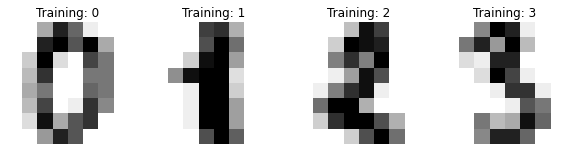

In [49]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### Usando el Estimado Gaussian Naive Bayes

Consideremos un ejemplo muy sencillo de clasificacion y para eso vamos a usar un metodo sencillo y rapido que es el denominado estimador Gausiano de Naive Bayes. Los Naive Bayes son un conjunto de algoritmos en Machine Learning basdos en el teorema de Bayes de Estadistica, con la suposicion "naive" de independencia entre cada par de "features" dado el valor de la clase.

EL teorema de Bayes provee un procedimiento matematico donde podemos calcular la probabilidad de una hipotesis dando un conocimiento previo (prior). Este se escribe matematicamente como:

$$
P[h|d] = \frac{P[d|h] P[h]}{P[d]}
$$
donde $P$ es una distribucion de probabilidad, $d$ son los datos historicos y $h$ es la hipotesis a probar. Por lo tanto, esta ecuacion se puede leer de la siguiente manera: la probabilidad condicional (posterior) de una hipotesis dada ocurre dado que los datos pueden ser obtenidos como una fraccion entre los productos de la probabilidad de que los datos $d$ ocurran dado que $h$ es cierto con la probabilidad de la hipotesis dividida por la probabilidad de los datos.

Ahora, la probabilidad "posterior" puede ser obtenida de un numero diferentes hipotesis. Basados en esto, la probabilidad maxima probable (MAP: maximum probably hypothesis) puede ser calculada. Por lo que luego de calcular la probabilidad "posterior" para un numero de diferentes hipotesis, tu puedes seleccionar la hipotesis con la probabilidad mas alta. La manera como contamos diferentes formas de la distribucion de la probabilidad dan lugar a diferentes metodos.

En el metodo llamado naive Bayes, las probabilidades de cada hipotesis son simplificadas, de tal manera que el calculo se vuelve mucho mas facil. Esta aproximacion dira que la realizacion de los datos para obtener $P[d|h]$  es independiente, lo que significa que:
 

$P[d|h] =  P[d_1|h] P[d_2|h] P[d_3|h] \cdots$.

El metodo se reduce a lo siguiente. Entrando un conjunto de datos clasificados (entrenamiento), podemos usar esto para obtener las probabilidades de cada clase y las probabilidades condicionales de cada valor de entrada para cada clase. Esta ultima probabilidad es obtenida directamente de los datos de entrenamiento como la frecuencia de cada "feature" en una clase dada dividida por la frecuencia de veces que aparece esta en esa clase.

Como estoy suena muy confuso, hagamos un ejemplo

Digamos que tenemos los siguientes datos:

|   | Outlook| Temperature| Humidity	| Windy	| Play Golf |
|--- |--- |--- |--- |--- | --- |
|0	|Rainy	| Hot	| High	| False	| No
|1	|Rainy	| Hot	| High	| True	| No
|2	|Overcast	| Hot	| High	| False	| Yes
|3	|Sunny	| Mild	| High	| False	| Yes
|4	|Sunny	| Cool	| Normal	| False	| Yes
|5	|Sunny	| Cool	| Normal	| True	| No
|6	|Overcast	| Cool	| Normal	| True	| Yes
|7	|Rainy	| Mild	| High	| False	| No
|8	|Rainy	| Cool	| Normal	| False	| Yes
|9	|Sunny	| Mild	| Normal	| False	| Yes
|10	|Rainy	| Mild	| Normal	| True	| Yes
|11	|Overcast	| Mild	| High	| True	| Yes
|12	| Overcast	| Hot	| Normal	| False	| Yes
|13	| Sunny	| Mild	| High	| True	| No


En este problema, la matrix de "features" son las columnas ‘Outlook’, ‘Temperature’, ‘Humidity’ y ‘Windy’. EL vector de salida o el resultado, contiene la clase de la variable para cada fila de la matrix de "features". EN este caso, el vector resultado es el que aparece en "Play Golf".

Lo primero es usar lo que nos dice Naive Bayes, que es que cada "feature" es independiente y tiene igual contribucion al resultado. 


Por ejemplo, el que este 'Hot' no tiene nada que ver con que haya humedad o que este Lluvioso. Las variables son independientes. Bueno aqui es aclaro que eventualmente tendremos un problema porque en aplicaciones reales, no hay independencia, pero la verdad es que aun asi, esto funciona muy bien.

Para usar el teorema de Bayes, lo vamos a escribir de otra manera, pero completamente equivalente

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

que si usamos la notacion que hemos estado usando

$$
P(y|X) = \frac{P(X|y)P(y)}{P(X)}
$$

Por ejemplo consideremos la primera columna

$$
X={Rainy, Hot, High, False} \;\;\;\; y=No
$$


Por lo tanto, $P(y|X)$ aqui significa, la probabilidad de "No jugar golf" dada que las condiciones de clima son  “Rainy outlook”, “Temperature is hot”, “high humidity” y “no wind”.

SI usamos ahora el Naive Bayes en este problema seria:

$$
P(y|x_1,\cdots,x_n) = \frac{P(x_1|y)P(x_2|y)\cdots P(x_n|y)P(y)}{P(x_1)P(x_2)\cdots P(x_n)}
$$

COn esto en mente es que el algoritmo basados en los datos hace le prediccion.


In [50]:
from sklearn.naive_bayes import GaussianNB
X = digits.data
y = digits.target

# Instantiate the estimator
clf = GaussianNB()

# Fit the estimator to the data, leaving out the last five samples
clf.fit(X[:-5], y[:-5])

# Use the model to predict the last several labels
y_pred = clf.predict(X[-5:])

print (y_pred)
print (y[-5:])

[9 0 8 9 8]
[9 0 8 9 8]


Aqui vemos que es muy facil hacer una clasificacion de los ultimos digitos. Ahora vamos a hacerlo sobre todos los datos y vamos a graficar lo que llaman la **matrix de confusion**, que es un representacion visual de como el clasificador esta trabajando.

La matrix de confusion $C$ es tal que $C(i,j)$ es igual al numero de observaciones conocidas a ser de $i$ pero que fueron predichas a ser del grupo $j$.

classification accuracy: 0.8580968280467446


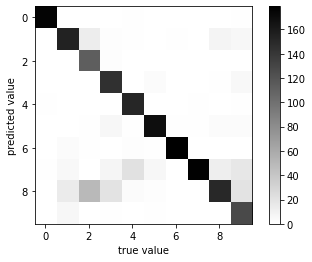

In [51]:
from sklearn import metrics

clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X)

def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred),
               cmap=plt.cm.binary, interpolation='none')
    plt.colorbar()
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    
print ("classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)

Como ven, si qe hay una valores de confusion. EL numero **2** es frecuentemente misclasificado por el numero **8**.

Usemos el submodulo ``metrics`` para imprimir la exactitud del clasificador.

In [52]:
print (metrics.accuracy_score(y, y_pred))

0.8580968280467446


Tenemos un tasa de exactitud de alrededor 85% para este modelo. Pero hay un problema, nosotros estamos probando el model con los datos que hemos usado para entrenar. Esto no es muy legal!. Esta no es la menor manera de validar el modelo. Aqui no fue tan mal pero puede haber otros modelos donde es mas catastrofico.

# Que tambien el modelo predice

Una pieza importante del proceso de aprendizaje es que podemos verdaderamente medir que tan bueno es el model, esto tambien se llama **validad el modelo**. Pero antes de discutir esto, veamos un ejemplo que usaremos para presentar esta idea.

## La importancia de dividir 

Hasta el momento hemos hablado del **confusion matrix** basados en los resultados de cualquier modelo. Por ejemplo miremos el caso de *K-Neighbors Classifier*.

classification accuracy: 1.0


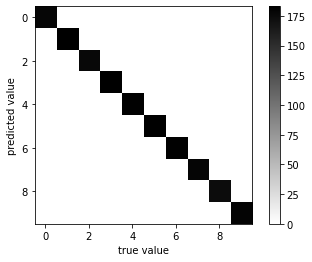

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)

print ("classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)

Nuestro clasificado de resultados perfectos, verdaderamente tenemos un esquema que clasifica sin error?

No!

El clasificador *K*-neighbors es un ejemplo de un clasificador "instance-based", que memoriza los datos de entrada y los compara compara con nuevos datos. Para verdaderamente medir que tambien este clasificador lo hace, deberiamos de usar un conjunto separado que el modelo ha ha visto, *validation set*.

Scikit-learn contiene utilidades para dividir los datos tal que parte sea de entrenamiento y parte sea para validacion.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, X_test.shape)

(1257, 64) (540, 64)


classification accuracy: 0.9833333333333333


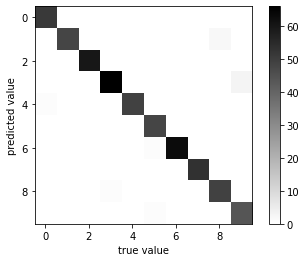

In [55]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("classification accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

Este da un indicador mas preciso de que tan bueno es el modelo.

Por eso, debes siempre dividir tus datos en **entrenamiento/prueba (train/test)** cuando se esta validando un modelo. 

## Explorando la metrica de validacion

Lo que hemos visto es la metrica mas sencilla para probar los acuerdos y nos no acuerdos, pero puede que no sea sufuciente. Por ejemplo en casos de eventos raros.

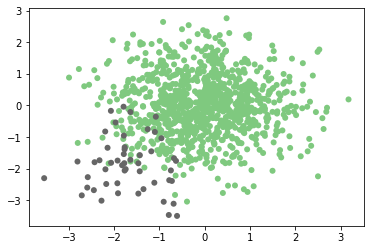

In [56]:
# Generate an un-balanced 2D dataset
np.random.seed(0)
X = np.vstack([np.random.normal(0, 1, (950, 2)),
               np.random.normal(-1.8, 0.8, (50, 2))])
y = np.hstack([np.zeros(950), np.ones(50)])

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='none',
            cmap=plt.cm.Accent);

### Explorando otros metodos de valoracion 

Hasta ahora, nosotros solo hemos usado la **precision (accuracy)** para evaluar nuestros algoritmos, pero hay otros metodos como el de **precision**, ** recall** y el **f1 score**.

In [57]:
from sklearn import metrics
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(kernel='linear').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("accuracy:", metrics.accuracy_score(y_test, y_pred))
print ("precision:", metrics.precision_score(y_test, y_pred))
print ("recall:", metrics.recall_score(y_test, y_pred))
print ("f1 score:", metrics.f1_score(y_test, y_pred))

accuracy: 0.972
precision: 0.8
recall: 0.75
f1 score: 0.7741935483870969


#### Que es lo que significa?

Estas son maneras de tener en cuenta no solo los resultados de clasificacion pero tambien los resultados **relativos a la categoria a la que en verdad pertenece**.


 $$ {\rm accuracy} \equiv \frac{\rm correct~labels}{\rm total~samples} $$

---

 $$ {\rm precision} \equiv \frac{\rm true~positives}{\rm true~positives + false~positives} $$

---

 $$ {\rm recall} \equiv \frac{\rm true~positives}{\rm true~positives + false~negatives} $$

---

 $$ F_1 \equiv 2 \frac{\rm precision \cdot recall}{\rm precision + recall} $$



La **accuracy**, **precision**, **recall**, y **f1-score** varian entre 0 y 1, siento 1 el valor optimo. Por lo que aqui hemos usado la definicion: 

- *True Positives* are those which are labeled ``1`` which are actually ``1``
- *False Positives* are those which are labeled ``1`` which are actually ``0``
- *True Negatives* are those which are labeled ``0`` which are actually ``0``
- *False Negatives* are those which are labeled ``0`` which are actually ``1``


Desde scikit podemos obtener estadistica de estos medidas llamando una sola funcion:

In [58]:
print (metrics.classification_report(y_test, y_pred,
                                    target_names=['background', 'foreground']))

              precision    recall  f1-score   support

  background       0.98      0.99      0.99       234
  foreground       0.80      0.75      0.77        16

    accuracy                           0.97       250
   macro avg       0.89      0.87      0.88       250
weighted avg       0.97      0.97      0.97       250



Esto nos dice, que sobre todo el clasificador es efectivo en un 97%, pero solamente identificamos 80% correctamente. COmo ven, hay que tener en cuenta estas metricas para verdaderamente validar el modelo. 

## Cross-Validation

Usar la dificion de entrenamiento/prueba como lo hemos hablado, tiene una desventaja **estas ignorando una porcion de la base de datos**, para tratar de solucionar este problema usamos cross-validation.

El metodo de cross-validation mas simple envuelve correr el modelo con dos pruebas, donde los datos se dificden dos veces.

In [59]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5)
print (X1.shape)
print (X2.shape)

(500, 2)
(500, 2)


In [60]:
y2_pred = SVC(kernel='linear').fit(X1, y1).predict(X2)
y1_pred = SVC(kernel='linear').fit(X2, y2).predict(X1)

print (np.mean([metrics.precision_score(y1, y1_pred),
               metrics.precision_score(y2, y2_pred)]))

0.7467320261437909


Este metodo se conoce como el **two-fold crossvalidation**, es un caso especial del **K-fold cross validation**.
Como es muy comuen, scikit tiene ya un metodo creado para esto.

In [61]:
from sklearn.model_selection import cross_val_score

# Let's do a 2-fold cross-validation of the SVC estimator
print (cross_val_score(SVC(kernel='linear'), X, y, cv=2, scoring='precision'))

[0.75       0.84210526]


Es posible usar ``sklearn.cross_validation.KFold`` y ``sklearn.cross_validation.StratifiedKFold`` directamente, como cualquier otro modelo de cros-validacion que este en el modulo ``cross_validation``.

Ejemplo: El clasificado ``SVC`` toma un parametro ``C`` cuyo valor de default es ``1``.  Usando el 5-fold crossvalidation, hacemos una grafica de la precicion como funcion del numero ``C``, para el estimado ``SVC``.  Para ver los resultados mejor, usamos espaciamiento logaritmico de ``C`` entre 0.1 y 100.

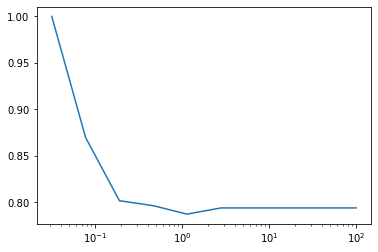

In [62]:
Cs = np.logspace(-1.5, 2, 10)
scores = []

for C in Cs:
    score = cross_val_score(SVC(kernel='linear', C=C), X, y, cv=5, scoring='precision')
    scores.append(score.mean())

plt.semilogx(Cs, scores)

## Grid Search

En ejemplo anterior es una ejemplo del metodo denominado **grid search** para evaluar el modelo. COmo es una tarea comun, tambien esta creada en Scikit-learn.  Fijese que ``GridSearchCV`` tiene un ``fit`` method: es decir es un estimador sobre estimadores!

In [63]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='linear')
Crange = np.logspace(-1.5, 2, 10)

grid = GridSearchCV(clf, param_grid={'C': Crange},
                    scoring='precision', cv=5)
grid.fit(X, y)

print ("best parameter choice:", grid.best_params_)

best parameter choice: {'C': 0.03162277660168379}


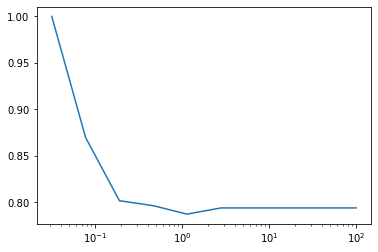

In [64]:
scores = [g for g in grid.cv_results_['mean_test_score']]
plt.semilogx(Crange, scores);

Grid search puede ser muy util cuando tratamos de mejorar el modelo para una tarea en particular.